In [2]:
#importing necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
import numpy as np 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file = open('/content/drive/MyDrive/data/Goodwill.txt').read()

In [4]:
tokenizer = Tokenizer()

In [5]:
data = file.lower().split("\n")

In [6]:
data

['   good will hunting',
 '           by',
 'matt damon & ben affleck',
 '',
 'fade in:',
 "ext. south boston st. patrick's day parade -- day cut to:",
 'int. l street bar & grille, south boston -- evening',
 "the bar is dirty, more than a little run down. if there is ever a cook on duty, he's not here now. as we pan across several empty tables, we can almost smell the odor of last nights beer and crushed pretzels on the floor.",
 '                               chuckie',
 '            oh my god, i got the most fucked up',
 "thing i been meanin' to tell you.",
 'as the camera rises, we find four young men seated around a table near the back of the bar.',
 'all oh jesus. here we go.',
 "the guy holding court is chuckie sullivan, 20, and the largest of the bunch. he is loud, boisterous, a born entertainer. next to him is will hunting, 20, handsome and confident, a soft- spoken leader. on will's right sits billy mcbride, 22, heavy, quiet, someone you definitely wouldn't want to tangle wit

In [7]:
#removing whitespace from the data
corpus = []
for line in data:
    a = line.strip()
    corpus.append(a)

In [ ]:
corpus

['good will hunting',
 'by',
 'matt damon & ben affleck',
 '',
 'fade in:',
 "ext. south boston st. patrick's day parade -- day cut to:",
 'int. l street bar & grille, south boston -- evening',
 "the bar is dirty, more than a little run down. if there is ever a cook on duty, he's not here now. as we pan across several empty tables, we can almost smell the odor of last nights beer and crushed pretzels on the floor.",
 'chuckie',
 'oh my god, i got the most fucked up',
 "thing i been meanin' to tell you.",
 'as the camera rises, we find four young men seated around a table near the back of the bar.',
 'all oh jesus. here we go.',
 "the guy holding court is chuckie sullivan, 20, and the largest of the bunch. he is loud, boisterous, a born entertainer. next to him is will hunting, 20, handsome and confident, a soft- spoken leader. on will's right sits billy mcbride, 22, heavy, quiet, someone you definitely wouldn't want to tangle with. finally there is morgan o'mally, 19, smaller than the 

In [8]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'will': 2, 'you': 3, 'a': 4, 'to': 5, 'i': 6, 'and': 7, 'sean': 8, 'of': 9, 'is': 10, 'lambeau': 11, 'in': 12, 'that': 13, 'chuckie': 14, 'he': 15, 'it': 16, 'skylar': 17, 'me': 18, 'with': 19, 'on': 20, 'his': 21, 'what': 22, 'my': 23, 'at': 24, 'up': 25, 'this': 26, "cont'd": 27, 'for': 28, "don't": 29, 'have': 30, 'do': 31, 'out': 32, "i'm": 33, 'your': 34, 'beat': 35, 'not': 36, 'know': 37, 'morgan': 38, 'so': 39, "it's": 40, "you're": 41, 'about': 42, 'be': 43, 'all': 44, 'him': 45, 'we': 46, 'was': 47, 'but': 48, 'int': 49, 'as': 50, 'one': 51, 'cut': 52, 'back': 53, 'are': 54, 'like': 55, 'just': 56, 'from': 57, 'want': 58, 'they': 59, 'no': 60, 'if': 61, 'can': 62, 'get': 63, 'an': 64, 'there': 65, 'look': 66, "that's": 67, 'here': 68, 'got': 69, 'right': 70, 'who': 71, 'day': 72, 'why': 73, 'now': 74, "fuckin'": 75, 'think': 76, 'ext': 77, 'well': 78, 'go': 79, 'see': 80, 'been': 81, 'over': 82, 'when': 83, "will's": 84, 'how': 85, 'down': 86, 'night': 87, 'yeah': 8

In [9]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [10]:
model = Sequential([
                    Embedding(total_words, 100, input_length = max_sequence_len-1),
                    Bidirectional(LSTM(150)),
                    Dense(total_words, activation = 'softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
xs[1]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [35]:
xs

array([[   0,    0,    0, ...,    0,    0,   96],
       [   0,    0,    0, ...,    0,   96,    2],
       [   0,    0,    0, ...,    0,    0, 1527],
       ...,
       [   0,    0,    0, ...,  113, 3291,  120],
       [   0,    0,    0, ..., 3291,  120,    1],
       [   0,    0,    0, ...,    0,    0,    1]], dtype=int32)

In [54]:
len(xs)

20095

In [38]:
ys[1]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [39]:
ys

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [40]:
len(ys[1])

3293

In [55]:
len(xs)

20095

In [56]:
20095/600

33.49166666666667

In [41]:
history = model.fit(xs, ys,batch_size=600,epochs=30 )

Epoch 1/30
34/34 [==============================] - 20s 577ms/step - loss: 2.9217 - accuracy: 0.3896
Epoch 2/30
34/34 [==============================] - 20s 575ms/step - loss: 2.8826 - accuracy: 0.4002
Epoch 3/30
34/34 [==============================] - 19s 573ms/step - loss: 2.8549 - accuracy: 0.4072
Epoch 4/30
34/34 [==============================] - 19s 572ms/step - loss: 2.8333 - accuracy: 0.4134
Epoch 5/30
34/34 [==============================] - 19s 574ms/step - loss: 2.8139 - accuracy: 0.4178
Epoch 6/30
34/34 [==============================] - 19s 570ms/step - loss: 2.7956 - accuracy: 0.4230
Epoch 7/30
34/34 [==============================] - 19s 572ms/step - loss: 2.7779 - accuracy: 0.4273
Epoch 8/30
34/34 [==============================] - 19s 570ms/step - loss: 2.7609 - accuracy: 0.4324
Epoch 9/30
34/34 [==============================] - 19s 573ms/step - loss: 2.7437 - accuracy: 0.4336
Epoch 10/30
34/34 [==============================] - 19s 571ms/step - loss: 2.7268 - accura

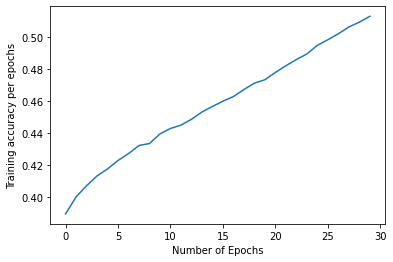

In [42]:
#plotting the training accuracy of the model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel("Number of Epochs")
plt.ylabel('Training accuracy per epochs')
plt.show()

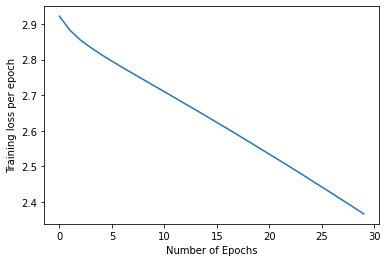

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel("Number of Epochs")
plt.ylabel('Training loss per epoch')
plt.show()

In [49]:
#generating next words given a seed
def next_word(seed):
  seed_text = seed
  next_words = 5
  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    
    output_word = ""
    for word, index in tokenizer.word_index.items():
      if index == predicted:
        output_word = word
        break
    seed_text += " " + output_word
  print(seed_text)

**GENERATING EXAMPLES AFTER TRAINING**

In [50]:
next_word('Lets go')

Lets go to the good with my


In [51]:
next_word('I want to meet')

I want to meet you a favor and you


In [52]:
next_word('Congratulations')

Congratulations thank you you want to


In [53]:
next_word('Where are ')

Where are  you ever heard of the
